___
Lab5

In [1]:
import mglearn

w[0]: 0.393906  b: -0.031804


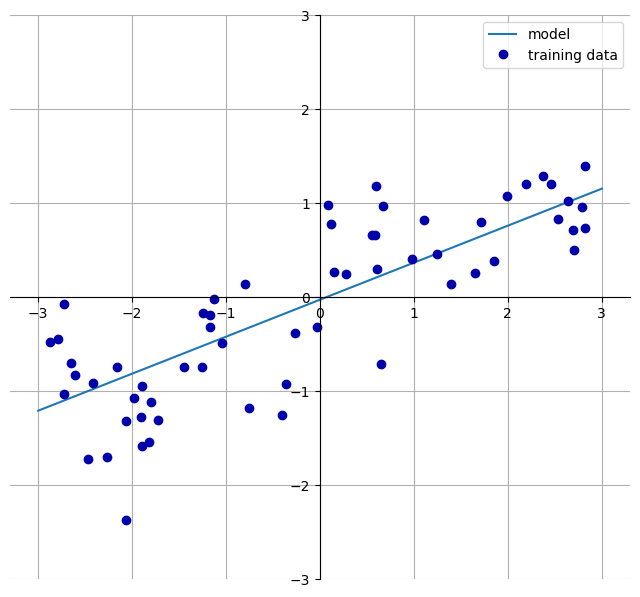

In [2]:
mglearn.plots.plot_linear_regression_wave()

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

[0.44153666]
-0.01711124414733381
0.6592061059587275
0.6932519118518163


In [4]:
import numpy as np
X_train_ext = np.concatenate((X_train,X_train**2),axis=1)
X_test_ext = np.concatenate((X_test,X_test**2),axis=1)


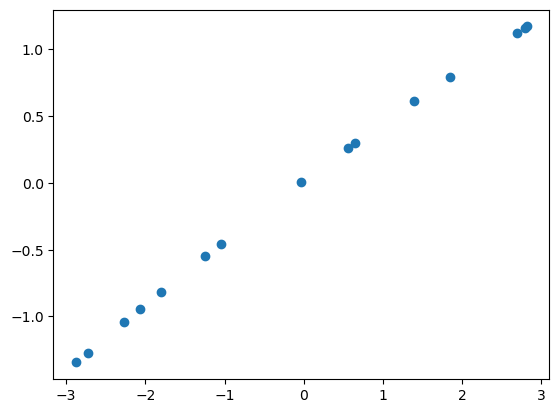

In [5]:
lr = LinearRegression().fit(X_train_ext, y_train)
y_hat = lr.predict(X_test_ext)
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X_test, y_hat)


In [6]:
print(lr.score(X_train_ext,y_train))
print(lr.score(X_test_ext,y_test))

0.6601817319830376
0.6861923283484095


In [7]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes.data.shape


(442, 10)

In [8]:
from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(degree=2,
    include_bias=False).fit_transform(diabetes.data)
y = diabetes.target
X.shape


(442, 65)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
lr = LinearRegression().fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.604815329837055
0.42424194594595066


In [10]:

from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))

0.4279131928462042
0.4387018239867464


In [11]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print(ridge10.score(X_train,y_train))
print(ridge10.score(X_test,y_test))

0.15099790967423454
0.1564498616754083


In [12]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print(ridge01.score(X_train,y_train))
print(ridge01.score(X_test,y_test))

0.5149371236445714
0.49537663053177583


In [13]:
ridge001 = Ridge(alpha=0.01).fit(X_train,y_train)
print(ridge001.score(X_train,y_train))
print(ridge001.score(X_test,y_test))

0.5371473311770834
0.5050889280291723


In [14]:
ridge100 = Ridge(alpha=100).fit(X_train,y_train)
print(ridge001.score(X_train,y_train))
print(ridge001.score(X_test,y_test))

0.5371473311770834
0.5050889280291723


___
Exercise 1

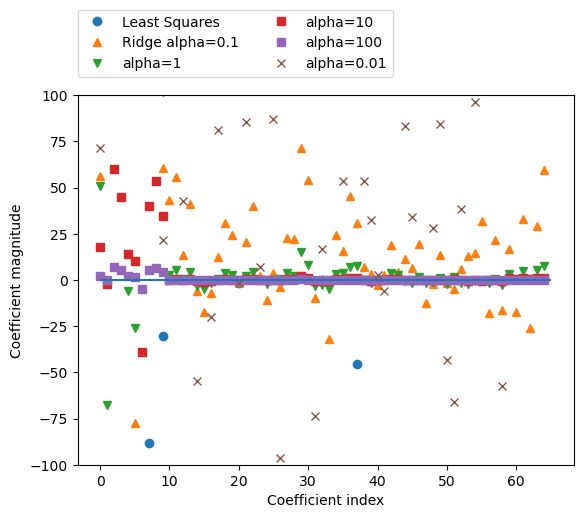

In [15]:
plt.plot(lr.coef_ , 'o', label="Least Squares")
plt.plot(ridge01.coef_ , '^', label="Ridge alpha=0.1")
plt.plot(ridge.coef_ ,'v',label="alpha=1")
plt.plot(ridge10.coef_ ,'s',label="alpha=10")
plt.plot(ridge100.coef_ ,'s',label="alpha=100")
plt.plot(ridge001.coef_ ,'x',label="alpha=0.01")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_ ))
plt.ylim(-100,100)
plt.legend(ncol=2,loc=(0,1.05))

___
Exercise 2

In [16]:
help(plt.hlines)

Help on function hlines in module matplotlib.pyplot:

hlines(y: 'float | ArrayLike', xmin: 'float | ArrayLike', xmax: 'float | ArrayLike', colors: 'ColorType | Sequence[ColorType] | None' = None, linestyles: 'LineStyleType' = 'solid', label: 'str' = '', *, data=None, **kwargs) -> 'LineCollection'
    Plot horizontal lines at each *y* from *xmin* to *xmax*.

    Parameters
    ----------
    y : float or array-like
        y-indexes where to plot the lines.

    xmin, xmax : float or array-like
        Respective beginning and end of each line. If scalars are
        provided, all lines will have the same length.

    colors : color or list of colors, default: :rc:`lines.color`

    linestyles : {'solid', 'dashed', 'dashdot', 'dotted'}, default: 'solid'

    label : str, default: ''

    Returns
    -------
    `~matplotlib.collections.LineCollection`

    Other Parameters
    ----------------
    data : indexable object, optional
        If given, the following parameters also accept a

65

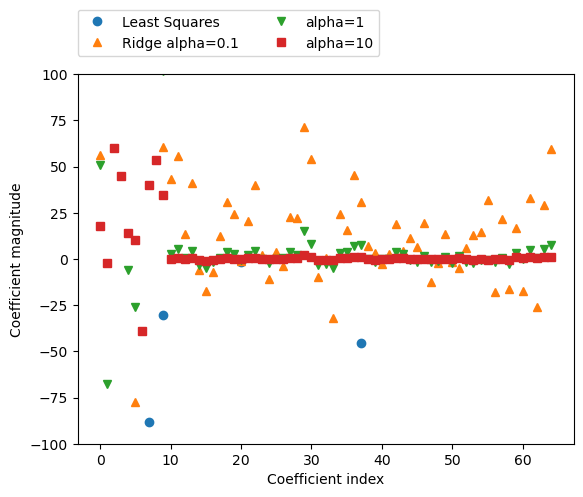

In [17]:
plt.plot(lr.coef_ , 'o', label="Least Squares")
plt.plot(ridge01.coef_ , '^', label="Ridge alpha=0.1")
plt.plot(ridge.coef_ ,'v',label="alpha=1")
plt.plot(ridge10.coef_ ,'s',label="alpha=10")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
#plt.hlines(0,0,len(lr.coef_ ))
plt.ylim(-100,100)
plt.legend(ncol=2,loc=(0,1.05))
len(lr.coef_)

plt.hlines(0,0,len(lr.coef_)) is used to plot a line from (0,0) to (65,0)

___

In [18]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train,y_train)
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))
print(np.sum(lasso.coef_ != 0))

0.34687336241710987
0.3791413953419158
3


In [19]:
lasso001 = Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)
print(lasso001.score(X_train,y_train))
print(lasso001.score(X_test,y_test))
print(np.sum(lasso001.coef_ != 0))

0.5375042588015271
0.5144146595591166
16


In [20]:
lasso00001 = Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
print(lasso00001.score(X_train,y_train))
print(lasso00001.score(X_test,y_test))
print(np.sum(lasso00001.coef_ != 0))

0.6011668318910368
0.4479479256263277
55


Text(0, 0.5, 'Coefficient magnitude')

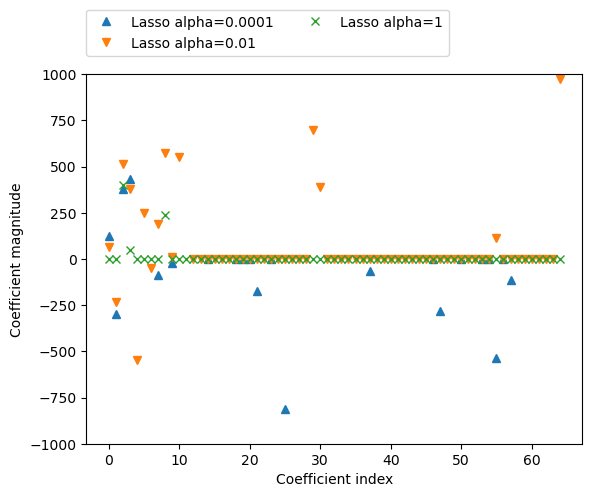

In [21]:
plt.plot(lasso00001.coef_ , '^', label="Lasso alpha=0.0001")
plt.plot(lasso001.coef_ , 'v', label="Lasso alpha=0.01")
plt.plot(lasso.coef_ , 'x', label="Lasso alpha=1")
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-1000,1000)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

___
Exercise 04

In [22]:
print(lasso.coef_)

[  0.          -0.         398.3858307   46.17542123   0.
   0.          -0.           0.         238.18730888   0.
   0.           0.           0.           0.          -0.
  -0.          -0.           0.           0.           0.
  -0.           0.           0.          -0.          -0.
   0.           0.           0.           0.           0.
   0.          -0.          -0.          -0.           0.
   0.           0.           0.           0.          -0.
  -0.           0.           0.           0.          -0.
  -0.          -0.           0.          -0.           0.
  -0.           0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.           0.
   0.           0.           0.           0.           0.        ]


np.sum(lasso.coef_ != 0) calculates the ratio of lasso.coef_ not equals to zero

___
Exercise 05

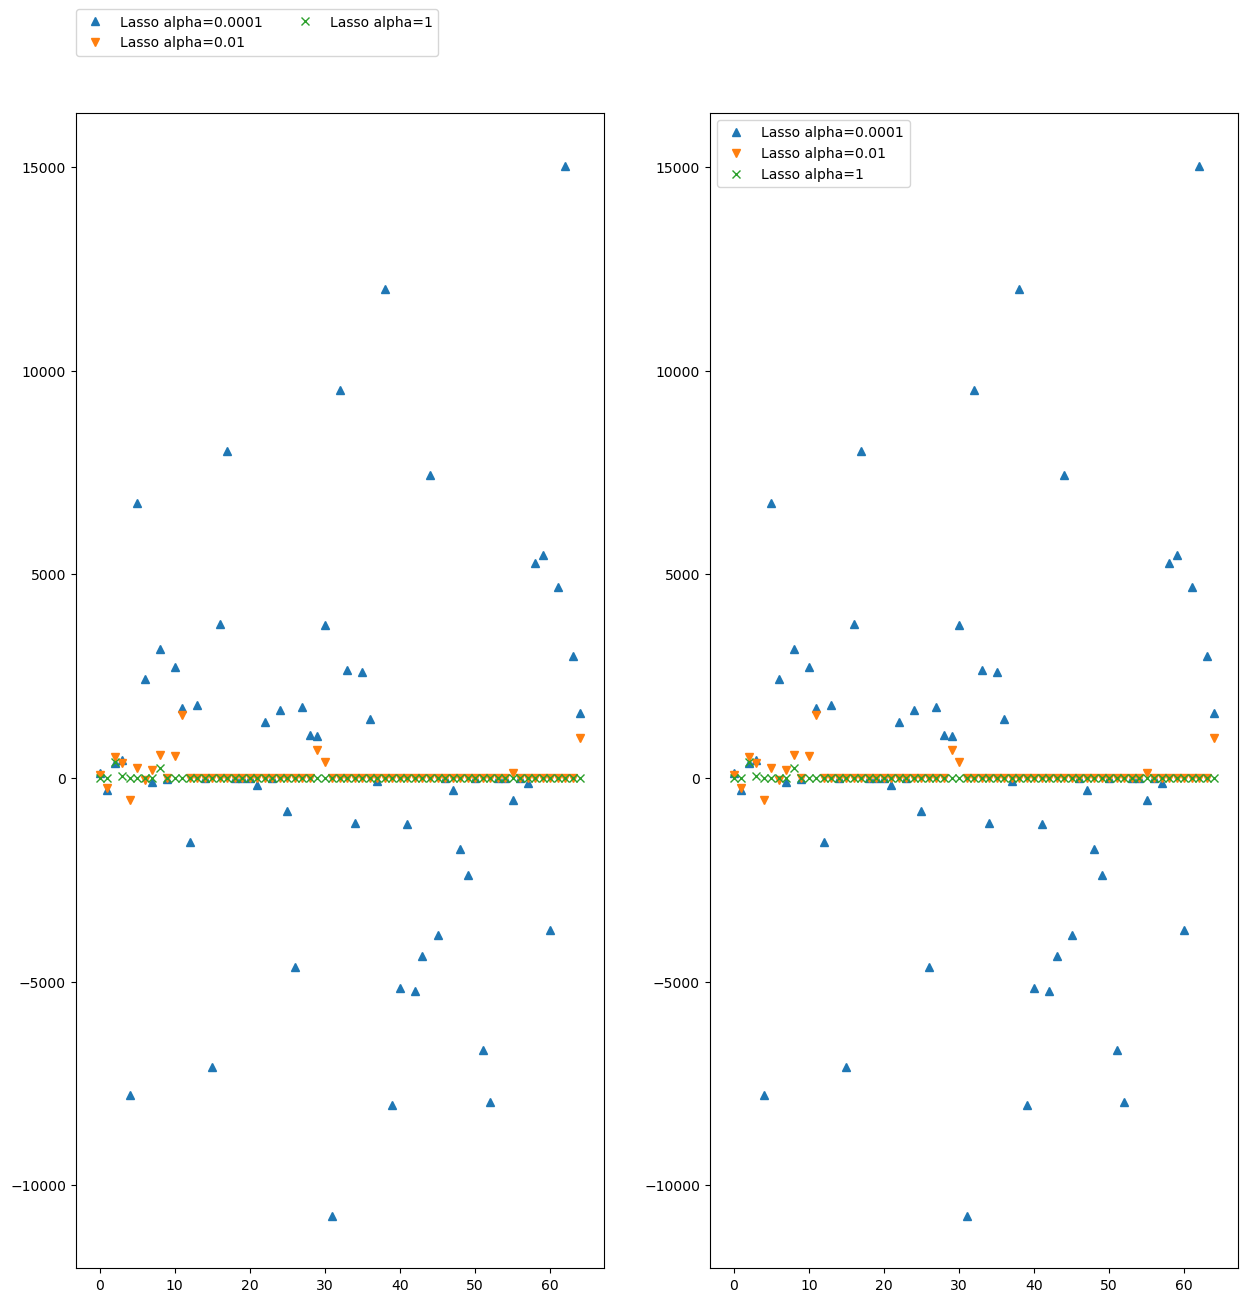

In [23]:
def test(ax):
    ax.plot(lasso00001.coef_ , '^', label="Lasso alpha=0.0001")
    ax.plot(lasso001.coef_ , 'v', label="Lasso alpha=0.01")
    ax.plot(lasso.coef_ , 'x', label="Lasso alpha=1")

fig, ax = plt.subplots(1, 2, figsize=(15, 15))
test(ax[0])
ax[0].legend(ncol=2,loc=(0,1.05))
test(ax[1])
ax[1].legend()

plt.legend(ncol=2,loc=(0,1.05)) moves the legend outside the picture
___